# Mapping migration

Introduction to vector data operations

## STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [8]:
%store -r


In [7]:
# Importing Packages
import os
import pathlib
from pathlib import Path
import geopandas as gpd
import pandas as pd
import earthpy
import requests
#print(earthpy.__file__)

#import importlib.metadata
#print(importlib.metadata.version("earthpy"))


## STEP 1: Create a directory for your data

For this challenge, you will need to download some data to the computer
you’re working on. We suggest using the `earthpy` library we develop to
manage your downloads, since it encapsulates many best practices as far
as:

1.  Where to store your data
2.  Dealing with archived data like .zip files
3.  Avoiding version control problems
4.  Making sure your code works cross-platform
5.  Avoiding duplicate downloads

If you’re working on one of our assignments through GitHub Classroom, it
also lets us build in some handy defaults so that you can see your data
files while you work.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Create a project folder</div></div><div class="callout-body-container callout-body"><p>The code below will help you get started with making a project
directory</p>
<ol type="1">
<li>Replace <code>project_title</code> with the actual project title,
Veery Migration 2023</li>
<li>Replace <code>'your-project-directory-name-here'</code> with a
<strong>descriptive</strong> name</li>
<li>The code should have printed out the path to your data files. Check
that your data directory exists and has data in it using the terminal or
your Finder/File Explorer.</li>
</ol></div></div>

> **File structure**
>
> These days, a lot of people find your file by searching for them or
> selecting from a `Bookmarks` or `Recents` list. Even if you don’t use
> it, your computer also keeps files in a **tree** structure of folders.
> Put another way, you can organize and find files by travelling along a
> unique **path**, e.g. `My Drive` \> `Documents` \>
> `My awesome project` \> `A project file` where each subsequent folder
> is **inside** the previous one. This is convenient because all the
> files for a project can be in the same place, and both people and
> computers can rapidly locate files they want, provided they remember
> the path.
>
> You may notice that when Python prints out a file path like this, the
> folder names are **separated** by a `/` or `\` (depending on your
> operating system). This character is called the **file separator**,
> and it tells you that the next piece of the path is **inside** the
> previous one.

In [ ]:
#project_dir = os.path.join(os.getcwd(), "earth-analytics")
#os.makedirs(project_dir, exist_ok=True)


#this is where i want my data folder to be made 
# "C:\Users\matth\Documents\GitHub\02-migration-mawo7952"


'C:\\Users\\matth\\earth-analytics\\data\\migration-data'

In [ ]:
# This downloaded the data to my repo which then I couldn't commit due to the size of the data. 

# Path to the parent folder
#current_wd = os.getcwd()

# Go one level up
#parent_folder = os.path.dirname(current_wd)

# C:\Users\matth\OneDrive - UCB-O365\Earth-Data-Science\Migration-Assignment\Data
# Name of the new folder you want to create
#new_folder_name = r"data\migration-data"

# Full path for the new folder
#data_dir = os.path.join(parent_folder, new_folder_name)

# Create the folder (exist_ok=True avoids error if it already exists)
#os.makedirs(data_dir, exist_ok=True)

#print(f"Folder created at: {data_dir}")

Folder created at: c:\Users\matth\Documents\GitHub\02-migration-mawo7952\data\migration-data


In [ ]:
documents_folder = Path.home() / "Documents"

# Define your data directory inside Documents
data_dir = documents_folder / "earth-analytics" / "migration-data"

# Create the directories if they don't exist
os.makedirs(data_dir, exist_ok=True)

print(f"Data will be saved to: {data_dir}")

#data_dir = r"C:\Users\matth\OneDrive - UCB-O365\Earth-Data-Science\Migration-Assignment\Data"



Data will be saved to: C:\Users\matth\Documents\earth-analytics\migration-data


## STEP 2: Define your study area – the ecoregions of North America

Your sample data package included a Shapefile of global **ecoregions**.
You should be able to see changes in the number of observations of Veery
thrush in each ecoregion throughout the year.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-info"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div></div><div class="callout-body-container callout-body"><p>You don’t have to use ecoregions to group species observations – you
could choose to use political boundaries like countries or states, other
natural boundaries like watersheds, or even uniform hexagonal areas as
is common in conservation work. We chose ecoregions because we expect
the suitability for a species at a particular time of year to be
relatively consistent across the region.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>The ecoregion data will be available as a <strong>shapefile</strong>.
Learn more about shapefiles and vector data in this <a
href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-vector-data/">Introduction
to Spatial Vector Data File Formats in Open Source Python</a></p></div></div>

### Load the ecoregions into Python

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Load ecoregions into Python</div></div><div class="callout-body-container callout-body"><p>Download and save ecoregion boundaries from the EPA:</p>
<ol type="1">
<li>Replace <code>a_path</code> with the path your created for your
ecoregions file.</li>
<li>Make a quick plot with <code>.plot()</code> to make sure the
download worked.</li>
</ol></div></div>

In [ ]:
# Set up the ecoregion boundary URL
ecoregions_url = "https://storage.googleapis.com/teow2016/Ecoregions2017.zip"

# Set up a folder to save the WWF ecoregions shapefile
ecoregions_dir = os.path.join(data_dir, 'wwf_ecoregions')
os.makedirs(ecoregions_dir, exist_ok=True)

# Full path to the shapefile
ecoregions_path = os.path.join(ecoregions_dir, 'wwf_ecoregions.shp')

# Download and save the shapefile only if it does not already exist
if not os.path.exists(ecoregions_path):
    print("Downloading WWF ecoregions shapefile...")
    ecoregions_gdf = gpd.read_file(ecoregions_url)  # read directly from URL
    ecoregions_gdf.to_file(ecoregions_path)         # save locally
    print(f"Saved shapefile to: {ecoregions_path}")
else:
    print(f"Shapefile already exists at: {ecoregions_path}")

<Axes: >

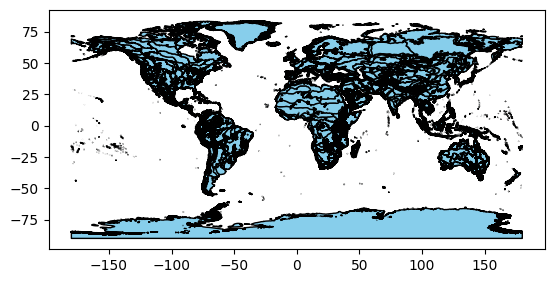

In [5]:


# Open up the ecoregions boundaries
ecoregions_gdf = (
    gpd.read_file(ecoregions_path)
    .rename(columns={
        'ECO_NAME': 'name',
        'SHAPE_AREA': 'area'})
    [['name', 'area', 'geometry']]
)

# Name the index so it will match the other data
ecoregions_gdf.index.name = 'ecoregion'

# Plot the ecoregions to check download
ecoregions_gdf.plot(edgecolor='black', color='skyblue')


## STEP 3: Load species observation data

For this challenge, you will use a database called the [Global
Biodiversity Information Facility (GBIF)](https://www.gbif.org/). GBIF
is compiled from species observation data all over the world, and
includes everything from museum specimens to photos taken by citizen
scientists in their backyards. We’ve compiled some sample data in the
same format that you will get from GBIF.

Let’s start by looking at a little of the raw data.

In [ ]:
# Set up directories
gbif_dir = os.path.join(data_dir, 'gbif_veery')
os.makedirs(gbif_dir, exist_ok=True)

# Direct CSV download URL
gbif_url = "https://ndownloader.figshare.com/files/58363291"
gbif_csv_path = os.path.join(gbif_dir, 'gbif_veery.csv')

# Download CSV only if it doesn't exist
if not os.path.exists(gbif_csv_path):
    print("Downloading GBIF CSV...")
    r = requests.get(gbif_url)
    r.raise_for_status()  # raise error if download failed
    with open(gbif_csv_path, 'wb') as f:
        f.write(r.content)

# Read CSV
gbif_df = pd.read_csv(gbif_csv_path, delimiter='\t')
gbif_df.head()




#  https://figshare.com/ndownloader/files/58363291



<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Load GBIF data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Look at the beginning of the file you downloaded using the code
below. What do you think the <strong>delimiter</strong> is?</li>
<li>Run the following code cell. What happens?</li>
<li>Uncomment and modify the parameters of <code>pd.read_csv()</code>
below until your data loads successfully and you have only the columns
you want.</li>
</ol></div></div>

You can use the following code to look at the beginning of your file:

In [9]:
# Load the GBIF data
gbif_df = pd.read_csv(
    gbif_csv_path, 
    delimiter='\t',
    index_col='gbifID',
    usecols=['gbifID', 'decimalLatitude', 'decimalLongitude', 'month']
)
gbif_df.head()

,decimalLatitude,decimalLongitude,month
gbifID,,,
4158712344,41.913700,-82.509200,5
4923515059,41.852812,-87.611721,5
4923522410,41.852812,-87.611721,9
4923520798,41.852812,-87.611721,5
4923520314,41.880356,-87.630134,9


### Convert the GBIF data to a GeoDataFrame

To plot the GBIF data, we need to convert it to a `GeoDataFrame` first.
This will make some special geospatial operations from `geopandas`
available, such as spatial joins and plotting.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Convert `DataFrame` to `GeoDataFrame`</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Replace <code>your_dataframe</code> with the name of the
<code>DataFrame</code> you just got from GBIF</li>
<li>Replace <code>longitude_column_name</code> and
<code>latitude_column_name</code> with column names from your
`DataFrame</li>
<li>Run the code to get a <code>GeoDataFrame</code> of the GBIF
data.</li>
</ol></div></div>

In [10]:
gbif_gdf = (
    gpd.GeoDataFrame(
        gbif_df, 
        geometry=gpd.points_from_xy(
            gbif_df.decimalLongitude, 
            gbif_df.decimalLatitude), 
        crs="EPSG:4326")
    # Select the desired columns
    [['month', 'geometry']]
)
gbif_gdf 

,month,geometry
gbifID,,
4158712344,5,POINT (-82.5092 41.9137)
4923515059,5,POINT (-87.61172 41.85281)
4923522410,9,POINT (-87.61172 41.85281)
4923520798,5,POINT (-87.61172 41.85281)
4923520314,9,POINT (-87.63013 41.88036)
...,...,...
4423534780,9,POINT (-75.1254 40.0626)
4524632357,6,POINT (-89.8049 44.6967)
4173211734,5,POINT (-82.4753 42.0478)


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Make sure to store the new version of your <code>DataFrame</code> for
other notebooks!</p>
<div id="f1412915" class="cell" data-execution_count="14">
<div class="sourceCode" id="cb1"><pre
class="sourceCode python cell-code"><code class="sourceCode python"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a><span class="op">%</span>store ecoregions_gdf gbif_gdf</span></code></pre></div>
</div></div></div>

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [11]:
%store ecoregions_gdf gbif_gdf

Stored 'ecoregions_gdf' (GeoDataFrame)
Stored 'gbif_gdf' (GeoDataFrame)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!